<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/TechnoHacks_DataScience_Internship/blob/main/Social_media_sentiment_analysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob


In [24]:
data=pd.read_csv("/content/Tweets.csv")
data.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [25]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [26]:
data.shape

(14640, 15)

In [30]:
data['sentiment'] = data['text'].apply(analyze_sentiment)


In [32]:
sentiment_counts = data['sentiment'].value_counts()
sentiment_counts

neutral     5494
positive    5477
negative    3669
Name: sentiment, dtype: int64

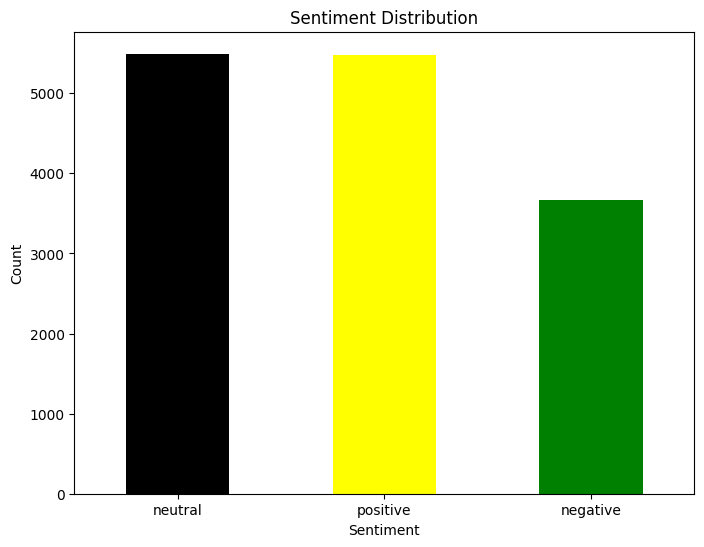

In [44]:
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['black', 'yellow', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

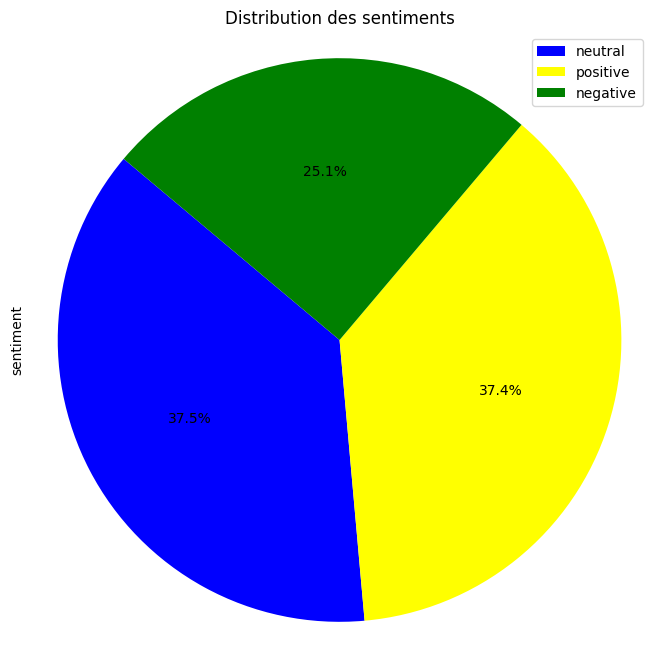

In [46]:
plt.figure(figsize=(8, 8))
colors=['blue', 'yellow', 'green']
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, labels=None, startangle=140)
plt.title('Distribution des sentiments')
plt.legend(labels=sentiment_counts.index, loc='upper right')
plt.axis('equal')  # Pour s'assurer que le cercle reste un cercle
plt.show()

In [14]:

# Function to analyze sentiment and categorize it as positive, negative, or neutral
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'



In [15]:
# Apply sentiment analysis to the 'text' column in the dataset
data['sentiment'] = data['text'].apply(analyze_sentiment)

In [13]:
print(data[['text', 'sentiment']].head())

                                                text sentiment
0                @VirginAmerica What @dhepburn said.   neutral
1  @VirginAmerica plus you've added commercials t...   neutral
2  @VirginAmerica I didn't today... Must mean I n...  negative
3  @VirginAmerica it's really aggressive to blast...  positive
4  @VirginAmerica and it's a really big bad thing...  negative
